# Chapter 3: Finding Top Themes

Dear user, now that the data collected is clean, \
we can split the chunk of text into words to find the most mentioned words to model out topics.

### REQUIREMENTS

For this notebook, you need to have:
- 5 x Pickle files of Scrapped data from Online sources (from Chap2.ipynb)

### TO DO SECTION

In [1]:
'''
Dear user, enter your Product here!
'''

product = "PICO 4 All-in-One VR Headset"

In [2]:
'''
Dear user, enter your 5 Online sources and \
directories to the 5 Pickle files of Scrapped data here!
'''
sources = ['youtube', 'reddit', 'pc_gamer', 'product_desc', 'user_manual']       # In sequence from source 1 to source 5

source1_dir = f"support/{product}/youtube/comment_list.pkl"
source2_dir = f"support/{product}/reddit/comment_list.pkl"
source3_dir = f"support/{product}/pc_gamer/pc_gamer.pkl"
source4_dir = f"support/{product}/product_desc/product_desc.pkl"
source5_dir = f"support/{product}/user_manual/user_manual.pkl"

In [3]:
'''
Dear user, please replace [Ctrl-F] the variable names and following variable names with the 5 Online sources used (if needed)!
'''

""" Initialise and Establish Dataset """
import pandas as pd

search_terms = product

youtube_comment_list = pd.read_pickle(source1_dir)
all_youtube_comments = None

reddit_comment_list = pd.read_pickle(source2_dir)
all_reddit_comments = None

pc_gamer = pd.read_pickle(source3_dir)

product_desc = pd.read_pickle(source4_dir)

user_manual = pd.read_pickle(source5_dir)

### RUN AS INTENDED (DO NOT CHANGE ANYTHING.)

In [4]:
""" Join all Comments into a corpus (only for Comments)"""
def combine_text(list_of_text):                     # define combine_text to take (list_of_text)
    combined_text = ' '.join(list_of_text)          # do this
    return combined_text                            # and give combined_text back

In [5]:
print("Joining youtube comments...")
all_youtube_comments = combine_text(youtube_comment_list)
print(all_youtube_comments)
print()
print("Joining reddit comments...")
all_reddit_comments = combine_text(reddit_comment_list)
print(all_reddit_comments)

Joining youtube comments...
you need to be online with it that is one way of them accessing information like face scans to be sent back to china for evaluation i have lack of trust when electronics ask to be on line amp ask for more personal details before you can use it  they are locking up these devices to their stores games controllers vr should be open platform so you can buy controllers including specialty gun like for any device you should also be able to play steam vr games regardless of your vr headset if they do not standardize these things vr is not going to be popular at leas nowhere near as popular as regular consoles  the middle fingers that is the real test did not apple copy these guys  who also checked his steam inbox 7 19  hi this head set have some sort of lag in games in wireless mode i buyed reverb g2 and sell it a few months ago because the lenses become blurry after minutes of use  highly reluctant to give facebook my hard earned cash made my mind up pico 4 it is 

In [6]:
""" Remove stopwords and Split """
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def proper_split(text):
    all_text = " ".join(word for word in text.split() if word not in stopwords)
    print(all_text)
    return all_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print("Split youtube comments:")
all_youtube_comments = proper_split(all_youtube_comments)
print()
print("Split reddit comments:")
all_reddit_comments = proper_split(all_reddit_comments)
print()
print("Split pc_gamer review:")
pc_gamer = proper_split(pc_gamer)
print()
print("Split product_desc:")
product_desc = proper_split(product_desc)
print()
print("Split user_manual:")
user_manual = proper_split(user_manual)

Split youtube comments:
need online one way accessing information like face scans sent back china evaluation lack trust electronics ask line amp ask personal details use locking devices stores games controllers vr open platform buy controllers including specialty gun like device also able play steam vr games regardless vr headset standardize things vr going popular leas nowhere near popular regular consoles middle fingers real test apple copy guys also checked steam inbox 7 19 hi head set sort lag games wireless mode buyed reverb g2 sell months ago lenses become blurry minutes use highly reluctant give facebook hard earned cash made mind pico 4 great review mate quest 3 quest 3 full colour past fish eye small controllers clash together headset much smaller much portable take around let math regarding controllers quick google search see double battery capacity 1800 2700mah 1 5v let realistic land 2400mah battery decent one economical 18650 lithium ion battery great capacity samsung 35e 

### Graph Visualisation of Top Words

In [8]:
""" Find and Plot top words """
import pickle
from collections import Counter
from nltk.util import everygrams
import matplotlib.pyplot as plt
from matplotlib import style

def find_top_words(all_text, file):
    top_length = 3                # top_length > 1 not useful after removing stopwords
    num_top = 30

    e_grams_counts = Counter(everygrams(all_text.split(), max_len=top_length))
    e_grams_most = e_grams_counts.most_common(num_top)
    print(e_grams_most)
    top_word = e_grams_most[0][0][0]
    print("Top Word:", top_word)
    top_word_count = e_grams_most[0][1]
    print("Top Word Count:", top_word_count)
    print("Number of e-grams found:", len(e_grams_most))
    pickle.dump(e_grams_most, open("support/%s/%s/e_grams_most.pkl" % (search_terms, file), "wb"))

    style.use("ggplot")
    x = []
    y = []
    for i in range(len(e_grams_most)):
        x.append(e_grams_most[i][0][0])       # assume 1 word
        y.append(e_grams_most[i][1])
    fig = plt.figure(figsize=(8, 6))
    plt.bar(x, y, color='r')
    plt.title(f'Top Words Found ({file})')
    plt.ylabel('Number of times')
    plt.xlabel('Words')
    plt.xticks(rotation=70, fontsize=8)
    plt.savefig("support/%s/%s/data_words.png" % (search_terms, file))
    plt.show()

--- TOP WORDS SUMMARY ---
Youtube comments:
need online one way accessing information like face scans sent back china evaluation lack trust electronics ask line amp ask personal details use locking devices stores games controllers vr open platform buy controllers including specialty gun like device also able play steam vr games regardless vr headset standardize things vr going popular leas nowhere near popular regular consoles middle fingers real test apple copy guys also checked steam inbox 7 19 hi head set sort lag games wireless mode buyed reverb g2 sell months ago lenses become blurry minutes use highly reluctant give facebook hard earned cash made mind pico 4 great review mate quest 3 quest 3 full colour past fish eye small controllers clash together headset much smaller much portable take around let math regarding controllers quick google search see double battery capacity 1800 2700mah 1 5v let realistic land 2400mah battery decent one economical 18650 lithium ion battery great c

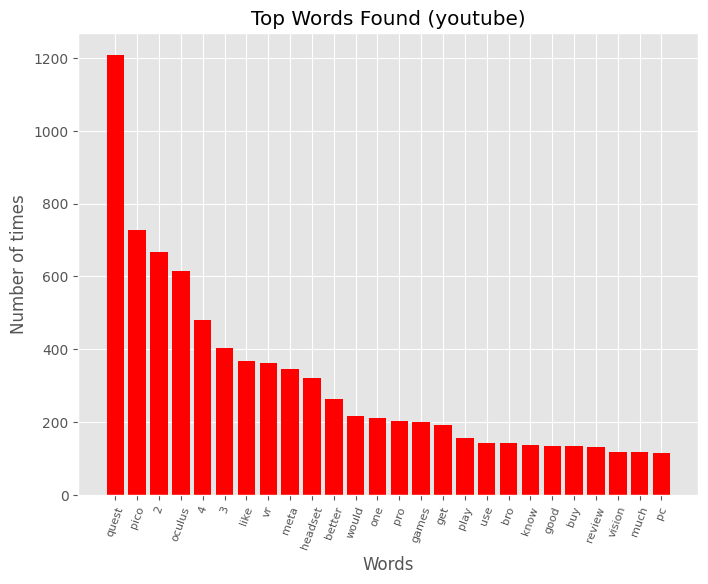


Reddit comments:
[(('vr',), 563), (('headset',), 536), (('like',), 514), (('would',), 485), (('quest',), 480), (('people',), 372), (('one',), 349), (('use',), 305), (('get',), 301), (('pico',), 299), (('2',), 298), (('even',), 270), (('also',), 259), (('really',), 237), (('think',), 231), (('data',), 225), (('better',), 222), (('apple',), 222), (('still',), 219), (('good',), 208), (('quest', '2'), 204), (('see',), 203), (('much',), 195), (('make',), 188), (('want',), 185), (('oculus',), 182), (('time',), 181), (('need',), 180), (('headsets',), 177), (('could',), 175)]
Top Word: vr
Top Word Count: 563
Number of e-grams found: 30


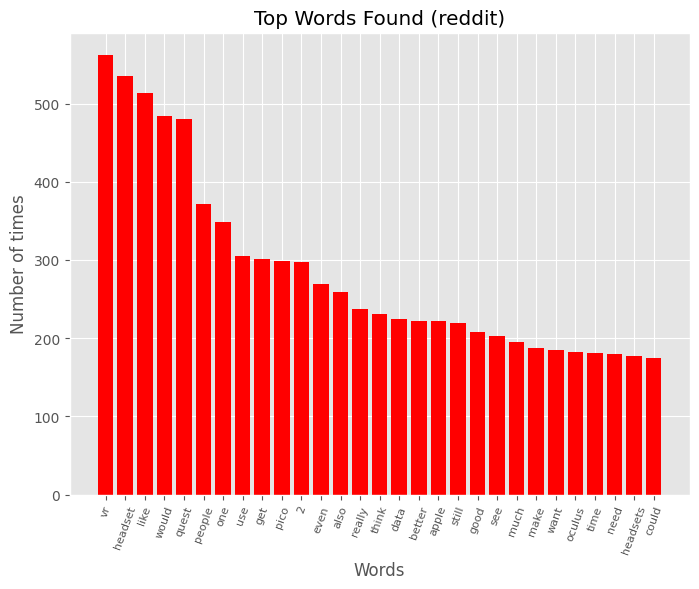


pc_gamer review:
[(('pico',), 19), (('pico', '4'), 16), (('4',), 16), (('2',), 11), (('much',), 9), (('quest',), 8), (('headset',), 8), (('quest', '2'), 7), (('vr',), 7), (('one',), 7), (('price',), 7), (('like',), 6), (('great',), 6), (('less',), 5), (('bytedance',), 5), (('lenses',), 5), (('view',), 5), (('little',), 5), (('issues',), 5), (('meta',), 4), (('entry',), 4), (('entry', 'level'), 4), (('level',), 4), (('though',), 4), (('tracking',), 4), (('life',), 4), (('gaming',), 4), (('comes',), 4), (('image',), 4), (('entry', 'level', 'vr'), 3)]
Top Word: pico
Top Word Count: 19
Number of e-grams found: 30


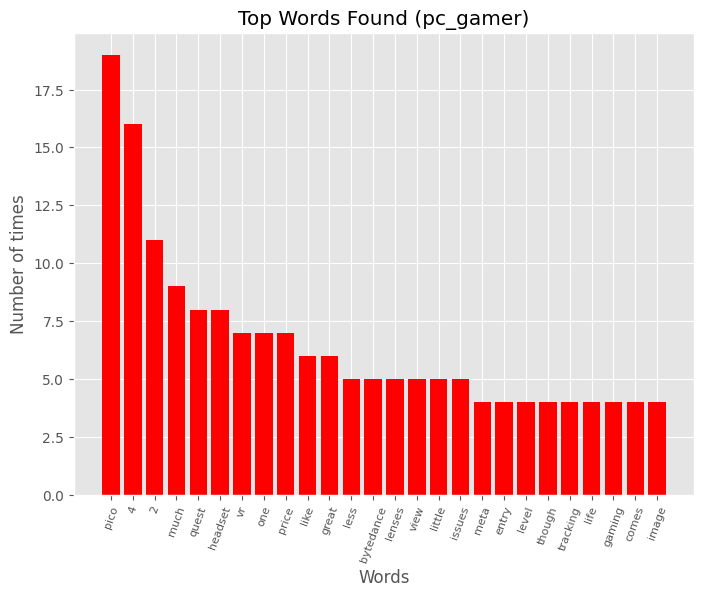


product_desc:
[(('pico',), 14), (('vr',), 9), (('pico', '4'), 7), (('4',), 7), (('view',), 6), (('positioning',), 5), (('rear',), 4), (('optical',), 4), (('real',), 4), (('sports',), 4), (('friends',), 4), (('means',), 3), (('front',), 3), (('super',), 3), (('proprietary',), 3), (('field',), 3), (('images',), 3), (('spatial',), 3), (('pico', 'os'), 3), (('os',), 3), (('fitness',), 3), (('real', 'time'), 3), (('time',), 3), (('live',), 3), (('balanced',), 2), (('balanced', 'design'), 2), (('design',), 2), (('wear',), 2), (('weight',), 2), (('centre',), 2)]
Top Word: pico
Top Word Count: 14
Number of e-grams found: 30


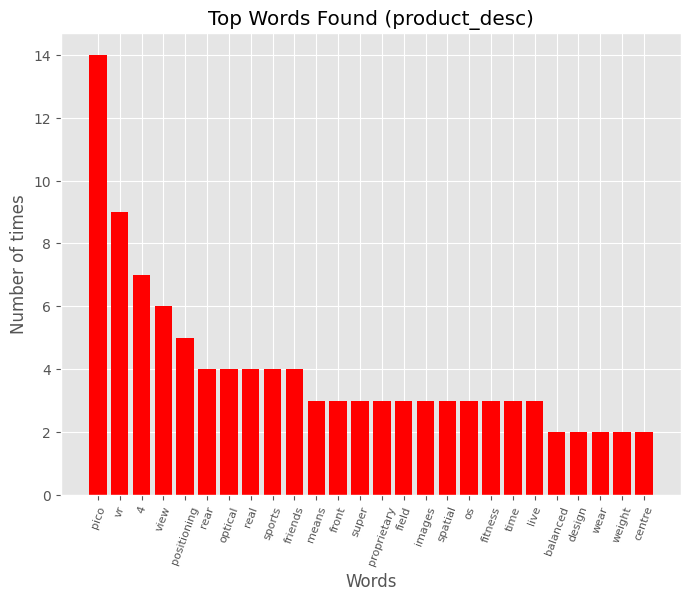


user_manual:
[(('headset',), 35), (('vr',), 30), (('vr', 'headset'), 27), (('controller',), 25), (('press',), 18), (('power',), 14), (('install',), 13), (('button',), 13), (('product',), 12), (('face',), 12), (('screen',), 11), (('2',), 11), (('glasses',), 11), (('face', 'cushion'), 11), (('cushion',), 11), (('use',), 10), (('battery',), 10), (('ipd',), 9), (('blue',), 9), (('home',), 9), (('strap',), 9), (('may',), 7), (('1',), 7), (('nose',), 7), (('indicator',), 7), (('light',), 6), (('using',), 6), (('glasses', 'spacer'), 6), (('spacer',), 6), (('wear',), 6)]
Top Word: headset
Top Word Count: 35
Number of e-grams found: 30


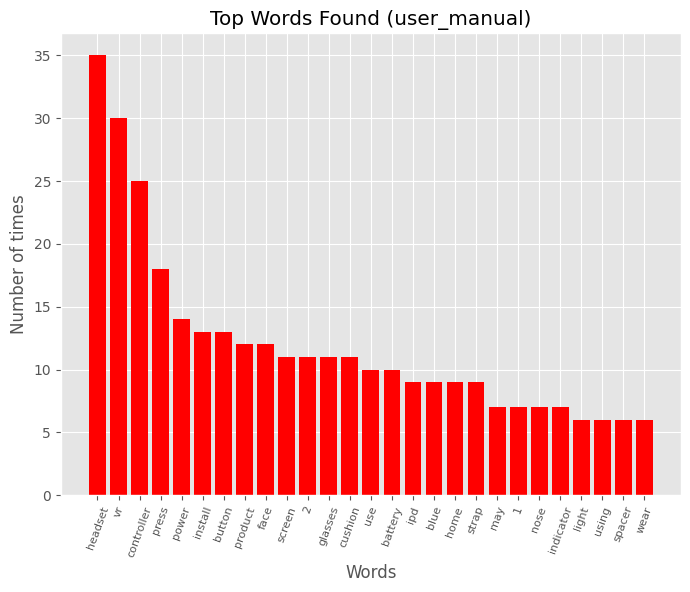

In [9]:
print("--- TOP WORDS SUMMARY ---")
print("Youtube comments:")
print(all_youtube_comments)
find_top_words(all_youtube_comments, "youtube")
print()
print("Reddit comments:")
find_top_words(all_reddit_comments, "reddit")
print()
print("pc_gamer review:")
find_top_words(pc_gamer, "pc_gamer")
print()
print("product_desc:")
find_top_words(product_desc, "product_desc")
print()
print("user_manual:")
find_top_words(user_manual, "user_manual")

### WordCloud Visualisation of Top Words

In [10]:
""" Generate WordCloud """
def generate_wordcloud(all_text, file):
    from wordcloud import WordCloud, STOPWORDS
    STOPWORDS.update(stopwords)

    wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2", collocations=False,
                max_font_size=150, include_numbers=True, random_state=42, max_words=50)

    wc.generate(all_text)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("%s (%s)" % (search_terms, file), fontsize=10)
    plt.savefig("support/%s/%s/WordCloud.png" % (search_terms, file))
    plt.show()

--- WORD CLOUD SUMMARY ---
youtube comments:


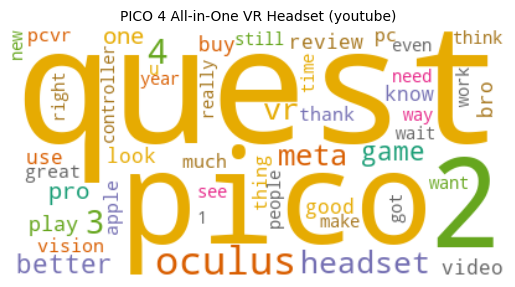


reddit comments:


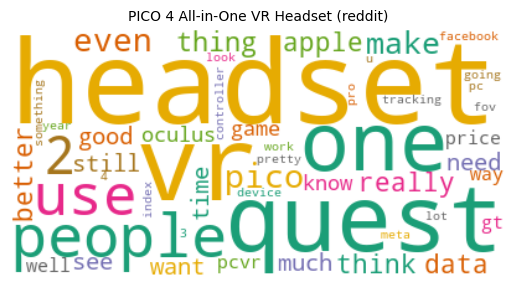


pc_gamer review:


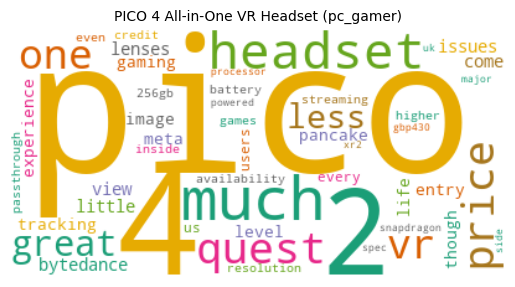


product_desc:


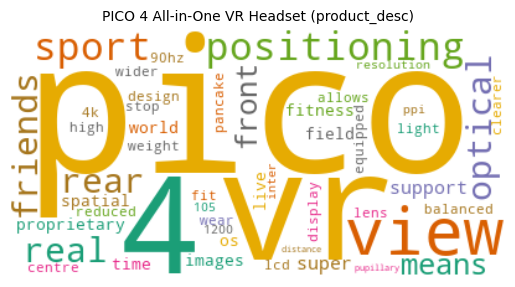


user_manual:


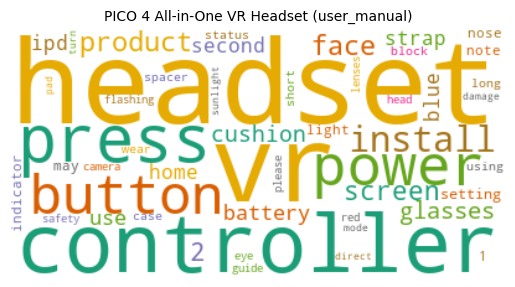

In [11]:
print("--- WORD CLOUD SUMMARY ---")
print("youtube comments:")
generate_wordcloud(all_youtube_comments, "youtube")
print()
print("reddit comments:")
generate_wordcloud(all_reddit_comments, "reddit")
print()
print("pc_gamer review:")
generate_wordcloud(pc_gamer, "pc_gamer")
print()
print("product_desc:")
generate_wordcloud(product_desc, "product_desc")
print()
print("user_manual:")
generate_wordcloud(user_manual, "user_manual")

### Modelling Design Opportunties from Top Words using ChatGPT

In [17]:
youtube_e_grams = pd.read_pickle("support/%s/youtube/e_grams_most.pkl" % search_terms)
reddit_e_grams = pd.read_pickle("support/%s/reddit/e_grams_most.pkl" % search_terms)
pc_gamer_e_grams = pd.read_pickle("support/%s/pc_gamer/e_grams_most.pkl" % search_terms)
product_desc_e_grams = pd.read_pickle("support/%s/product_desc/e_grams_most.pkl" % search_terms)
user_manual_e_grams = pd.read_pickle("support/%s/user_manual/e_grams_most.pkl" % search_terms)

In [18]:
""" Set up OpenAI API key """
import os
from dotenv import load_dotenv

load_dotenv()

key = os.getenv("OPENAI_API_KEY")

In [19]:
""" Modelling Design Opportunties from Top Words """
import pickle
import json
from openai import OpenAI
client = OpenAI()

e_grams_list = [youtube_e_grams, reddit_e_grams, pc_gamer_e_grams, product_desc_e_grams, user_manual_e_grams]

for i in range(len(e_grams_list)):
    question =  f"You are given a list of top mentioned words from a source regarding the {search_terms}. \
                Strictly based on the list delimited by triple quotes, identify and rank ten opportunities for design improvements with the {product}. \
                '''{e_grams_list[i]}''' "
    template = " Express the answer only as a Python dictionary (with double quotes, strictly no single quotes) with the key as a physical component (do not add numbering) and the value as a concised explanation with a maximum of 45 characters. If you don't know the answer to the question, strictly state 'I don't know'."
    prompt = question + template

    chat_completion = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt,}],
        temperature=0.5,                                        # adjust persona and temperature
    )

    result = chat_completion.choices[0].message.content

    pickle.dump(result, open("support/%s/%s/egrams_%s_design_opportunities.pkl" % (product, sources[i], sources[i]), "wb"))

    data_string = pd.read_pickle("support/%s/%s/egrams_%s_design_opportunities.pkl" % (product, sources[i], sources[i]))
    op_data = json.loads(data_string)

    try:
        components = op_data.keys()
        descriptions = op_data.values()

        df = pd.DataFrame({'Component': components, 'Opportunity': descriptions})

        print(f"Design Opportunities modelled from {sources[i]}:")
        print(df)
        print("\n")
    except:
        print("Invalid Response. Please regenerate.")


Design Opportunities modelled from youtube:
              Component                              Opportunity
0   Quest Compatibility   Improve compatibility with Quest games
1     Oculus Comparison  Enhance features to compete with Oculus
2     Game Availability        Increase range of available games
3           Ease of Use          Make headset more user-friendly
4   Purchase Motivation     Offer incentives to encourage buying
5  Review Consideration         Address issues raised in reviews
6        Vision Quality             Improve visual quality of VR
7      PC Compatibility      Enhance compatibility with PC games
8      Meta Integration  Improve integration with Meta platforms
9           Pro Version          Consider creating a pro version


Design Opportunities modelled from reddit:
  Component                                    Opportunity
0        VR  Improve VR quality for better user experience
1   Headset         Enhance comfort and fit of the headset
2     Quest        